In [1]:
import warnings

import pandas as pd
import numpy as np

from functions.loading import load_data

from functions.preprocessing import outliers_preprocess
from functions.training_pipeline import training_pipeline
from functions.models import xgboost_model, catboost_model, lgbm_model

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None


In [2]:
path_rawdata = 'data/raw_data/'
path_models = 'models/proprietary_data/'
path_Benchmark = 'Benchmark/'
path_results = 'results/proprietary_data/'
path_plot = path_results +'plot/'
path_intermediary = 'data/intermediary_data/proprietary_data/'
path_plot = 'results/proprietary_data/plot/'
# ,"CF3_log", "CF123_log"
targets = ["CF1_log","CF2_log","CF3_log", "CF123_log"]
models = {
        "xgboost": xgboost_model,
        "catboost": catboost_model,
        "lgbm": lgbm_model,
}
training_parameters = {
    "seed":0,
    "n_iter":10,
    "extended_features": [
            "Revenue_log",
            "EMP_log",
            "Asset_log",
            "NPPE_log",
            "CapEx_log",
            "Age",
            "CapInten",
            "GMAR",
            "Leverage",
            "Price",
            "FuelIntensity",
            "FiscalYear",
            "ENEConsume_log",
            "ENEProduce_log",
            "INTAN_log",
            "AccuDep_log",
            "COGS_log",
        ],
    "selec_sect":["GICSSubInd", "GICSInd", "GICSGroup"],
    "cross_val": False,
}

Summary_Final=[]
Summary_Final_train = []
ensemble =[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []

In [3]:
preprocessed_dataset = load_data(path_rawdata, save=True)

In [4]:
preprocessed_dataset["CF1"] = preprocessed_dataset["CF1_merge"] 
preprocessed_dataset["CF2"] = preprocessed_dataset["CF2_merge"] 
preprocessed_dataset["CF3"] = preprocessed_dataset["CF3_merge"] 
preprocessed_dataset["CF123"] = preprocessed_dataset["CF123_merge"] 
preprocessed_dataset["CDP_CF2"] = preprocessed_dataset["CDP_CF2_location"]
preprocessed_dataset["country_sector"] = preprocessed_dataset["CountryHQ"].astype(str) + "_" + preprocessed_dataset["GICSSubInd"].astype(str)
# 50 sec
threshold_under=1.5
threshold_over=2.5
for target in ["CF1_merge", "CF2_merge", "CF3_merge", "CF123_merge"] : 
    preprocessed_dataset = outliers_preprocess(preprocessed_dataset, target, threshold_under=threshold_under, threshold_over=threshold_over)


In [5]:
# threshold_under=1.5
# threshold_over=2.5

# scope = "CF1_merge"
# temp = preprocessed_dataset[(preprocessed_dataset[scope].notna())]
# print(scope,)
# res = outliers_preprocess(temp, scope, threshold_under=threshold_under, threshold_over=np.inf)
# print( "nb_rows filtered (under):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# res = outliers_preprocess(temp, scope, threshold_under=np.inf, threshold_over=threshold_over)
# print( "nb_rows filtered (over):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# print("\n")

# scope = "CF2_merge"
# temp = preprocessed_dataset[(preprocessed_dataset[scope].notna())]
# print(scope,)
# res = outliers_preprocess(temp, scope, threshold_under=threshold_under, threshold_over=np.inf)
# print( "nb_rows filtered (under):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# res = outliers_preprocess(temp, scope, threshold_under=np.inf, threshold_over=threshold_over)
# print( "nb_rows filtered (over):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# print("\n")

# scope = "CF3_merge"
# temp = preprocessed_dataset[(preprocessed_dataset[scope].notna())]
# print(scope,)
# res = outliers_preprocess(temp, scope, threshold_under=threshold_under, threshold_over=np.inf)
# print( "nb_rows filtered (under):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# res = outliers_preprocess(temp, scope, threshold_under=np.inf, threshold_over=threshold_over)
# print( "nb_rows filtered (over):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# print("\n")

# scope = "CF123_merge"
# temp = preprocessed_dataset[(preprocessed_dataset[scope].notna())]
# print(scope,)
# res = outliers_preprocess(temp, scope, threshold_under=threshold_under, threshold_over=np.inf)
# print( "nb_rows filtered (under):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# res = outliers_preprocess(temp, scope, threshold_under=np.inf, threshold_over=threshold_over)
# print( "nb_rows filtered (over):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")

# Base example

CF1_log
Using pre created preprocessed files
preprocessing done
modelisation done
CF2_log
Using pre created preprocessed files
preprocessing done
modelisation done
CF3_log
Using pre created preprocessed files
preprocessing done
modelisation done
CF123_log
Using pre created preprocessed files
preprocessing done
modelisation done


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

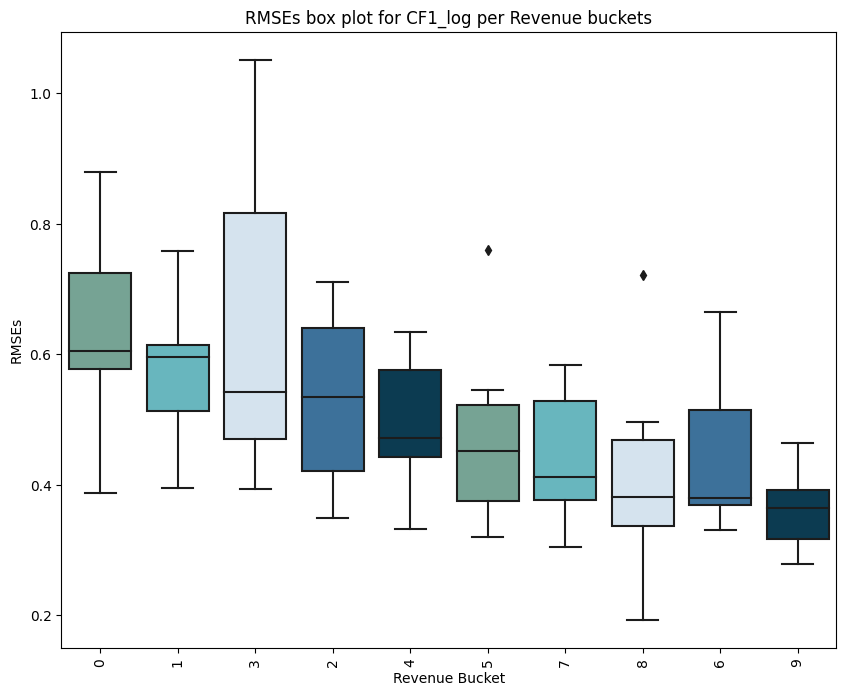

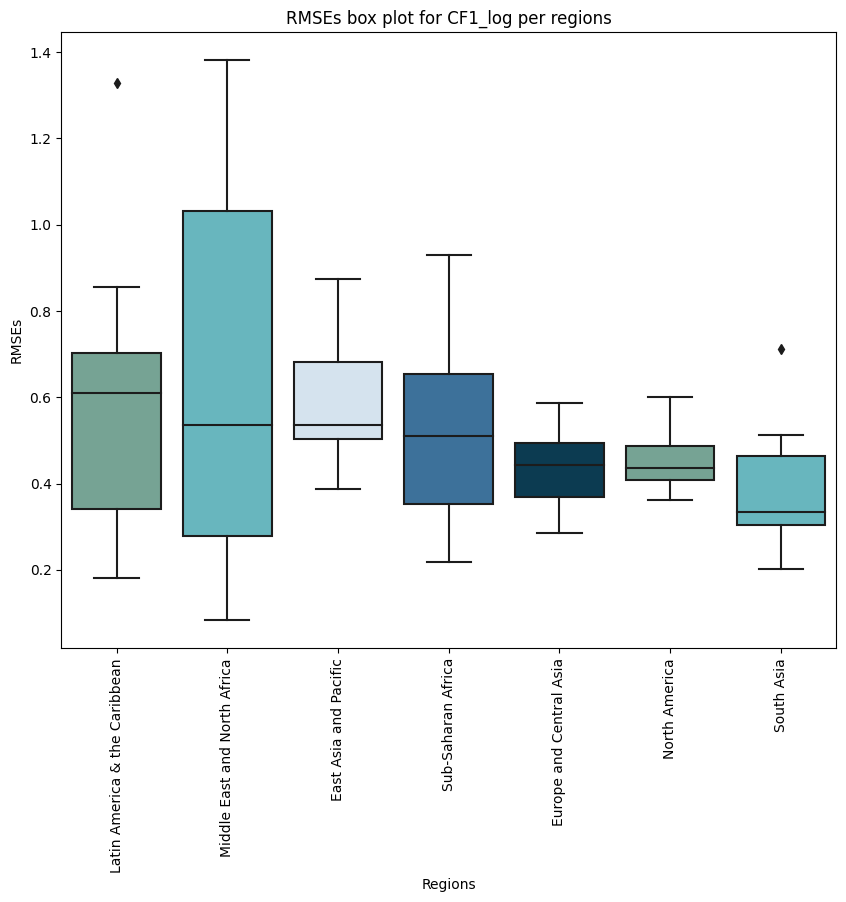

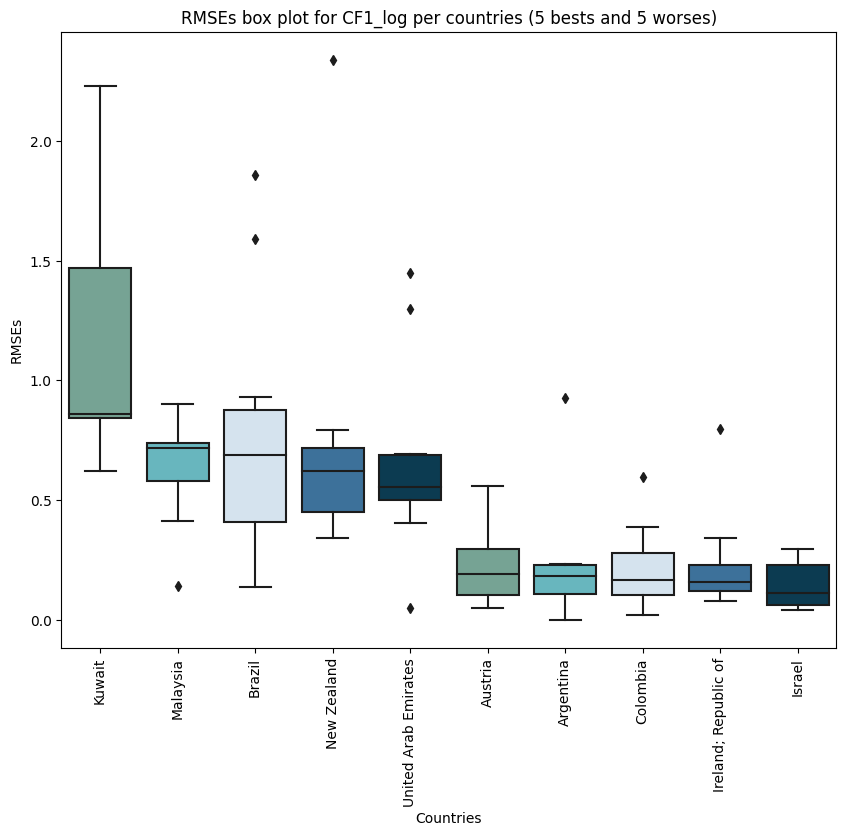

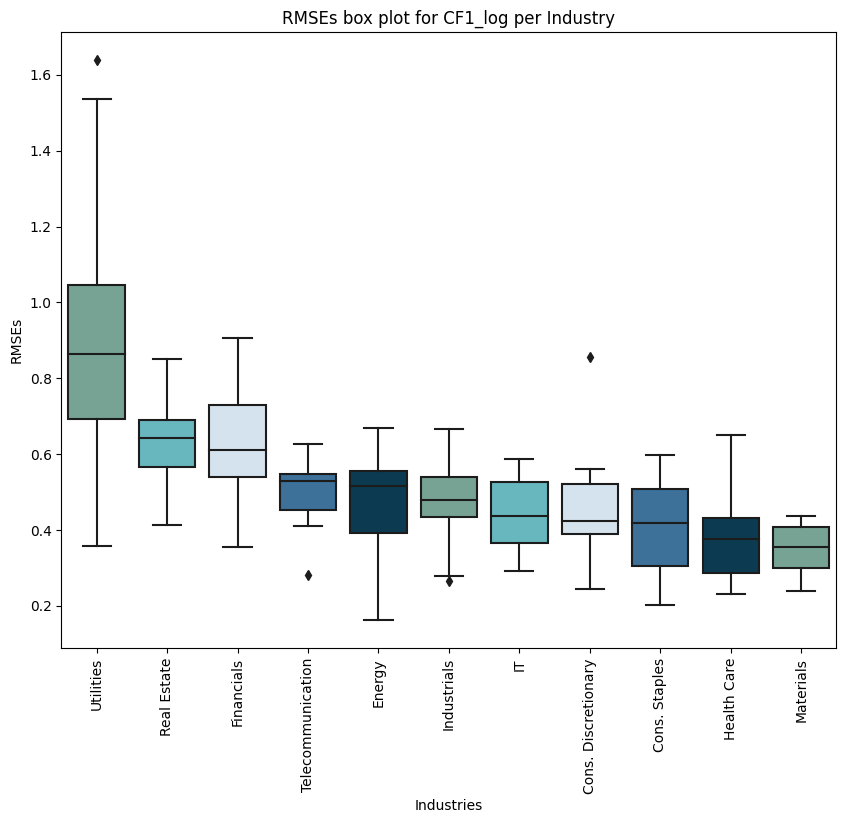

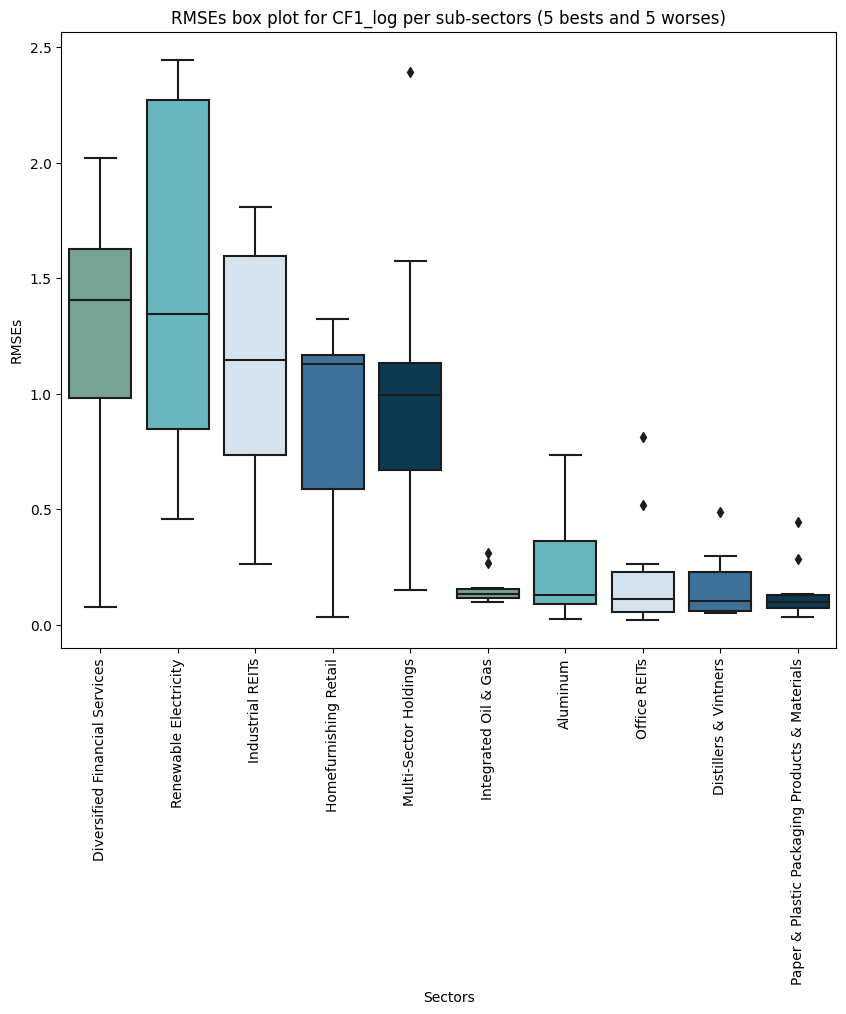

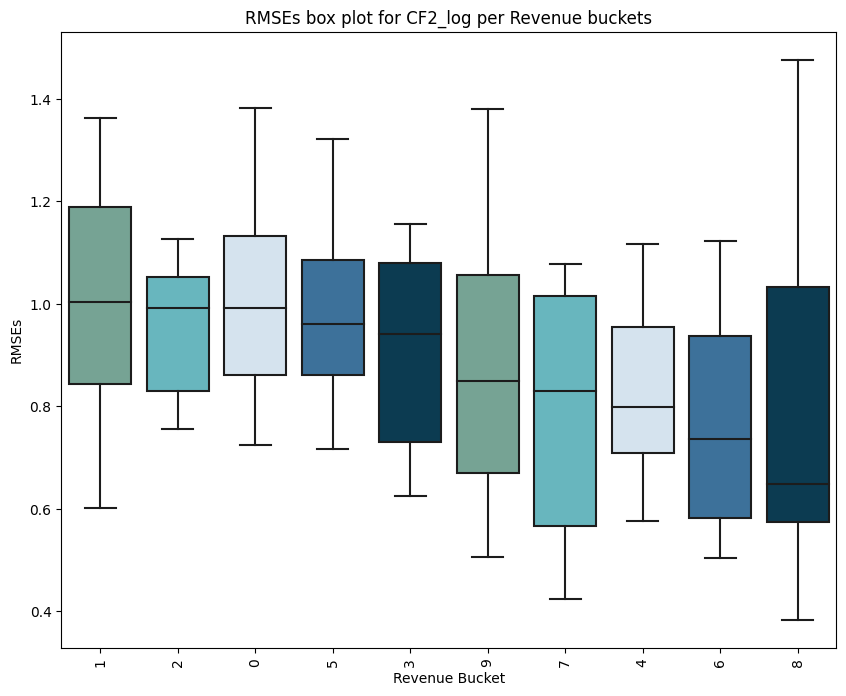

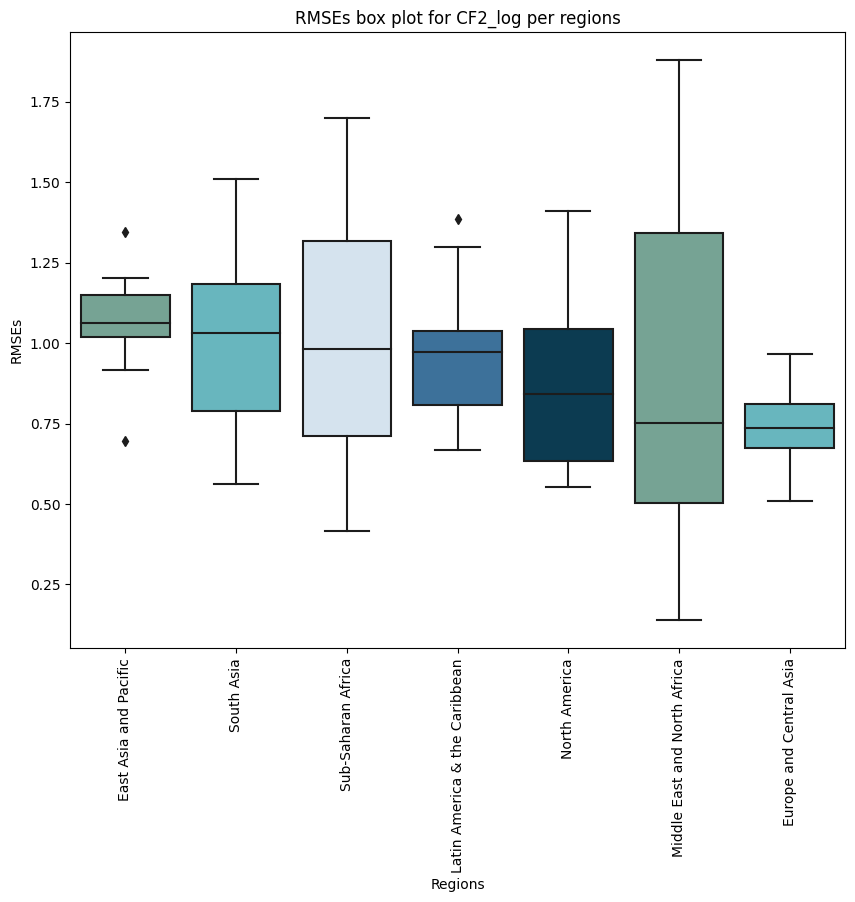

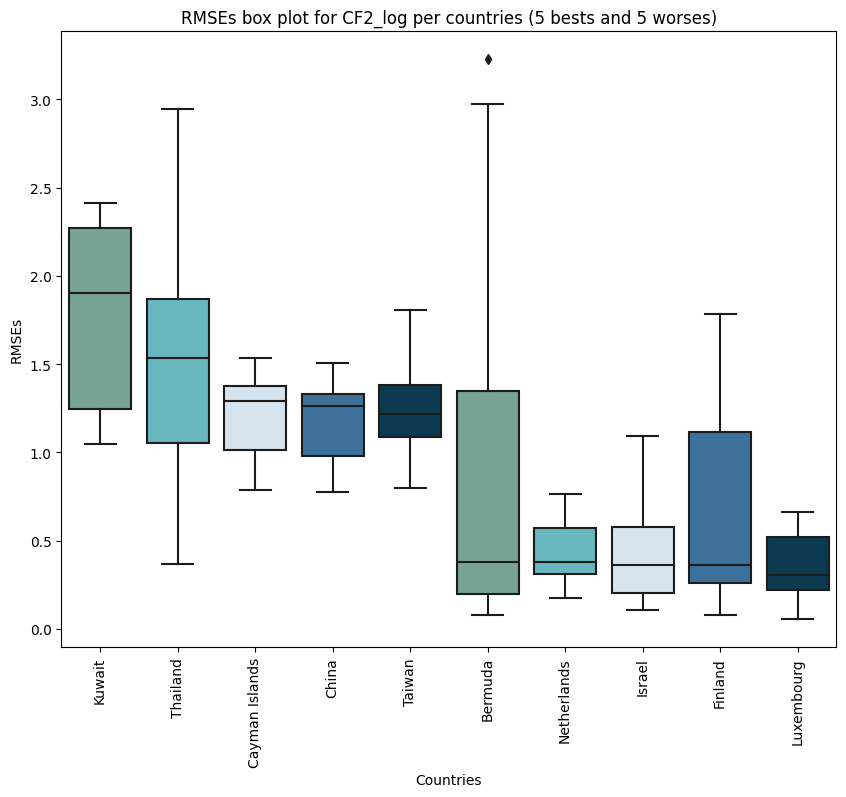

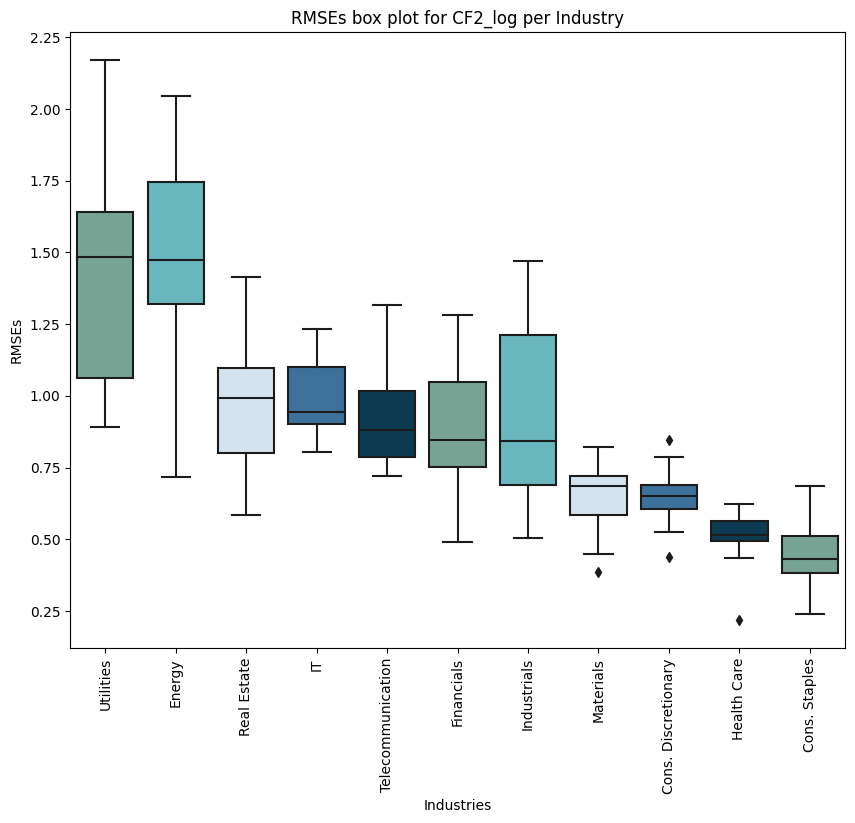

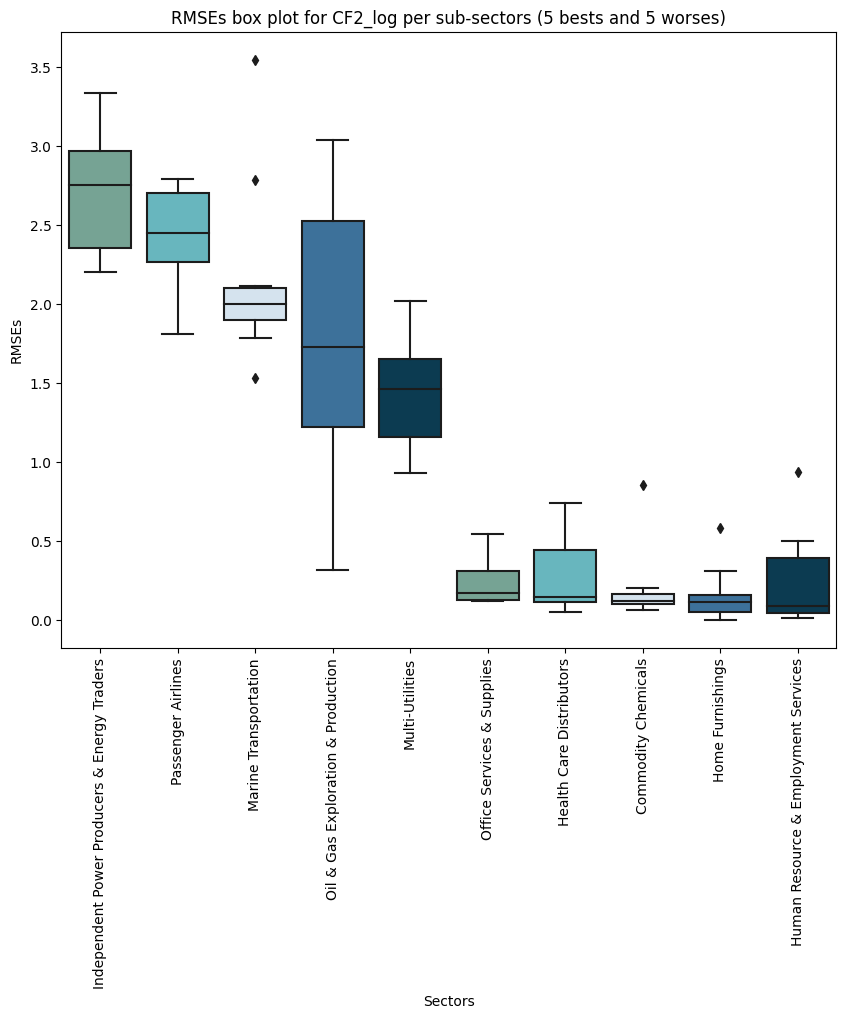

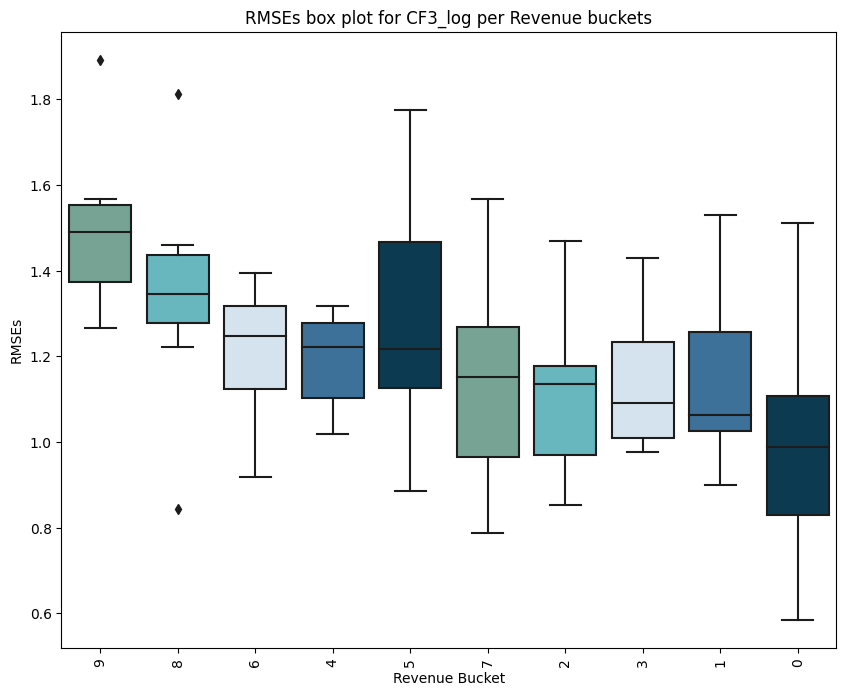

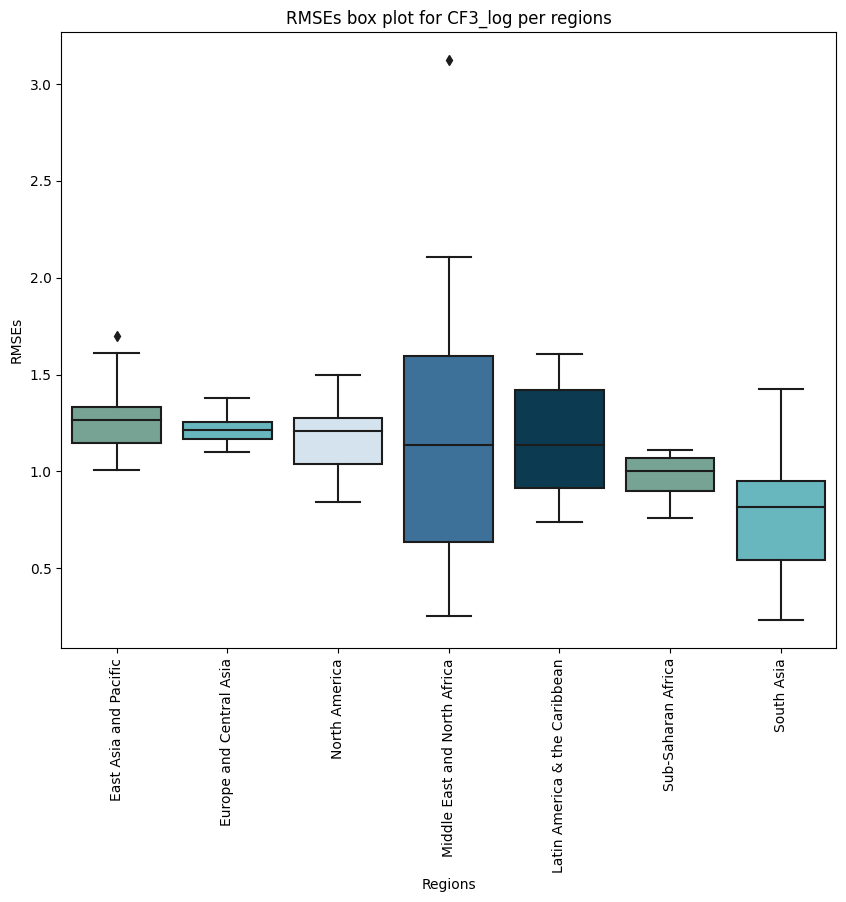

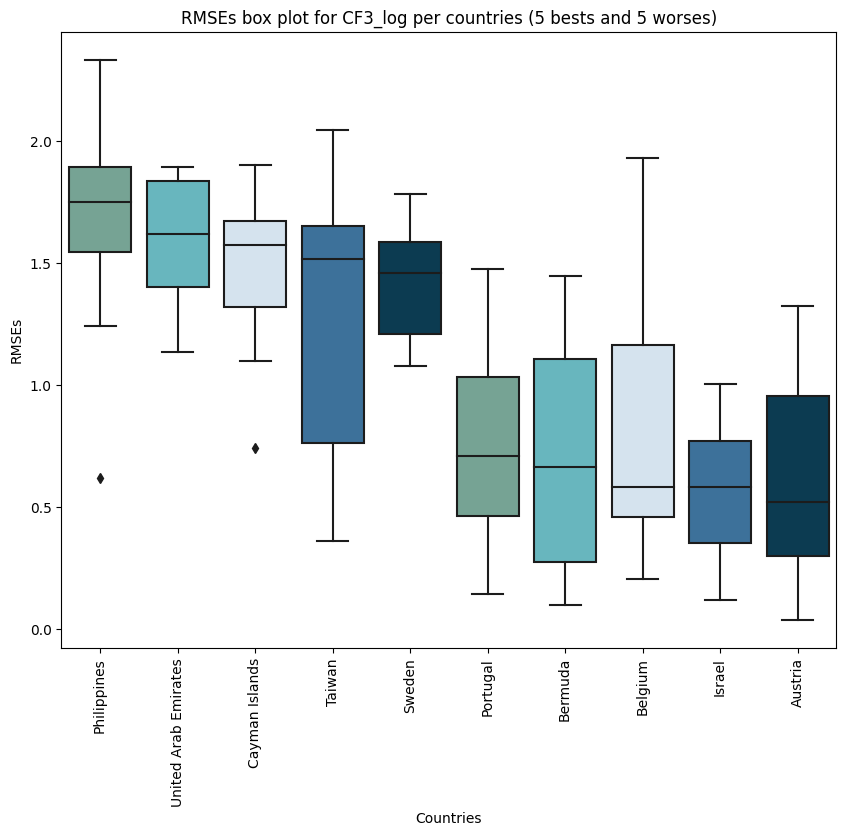

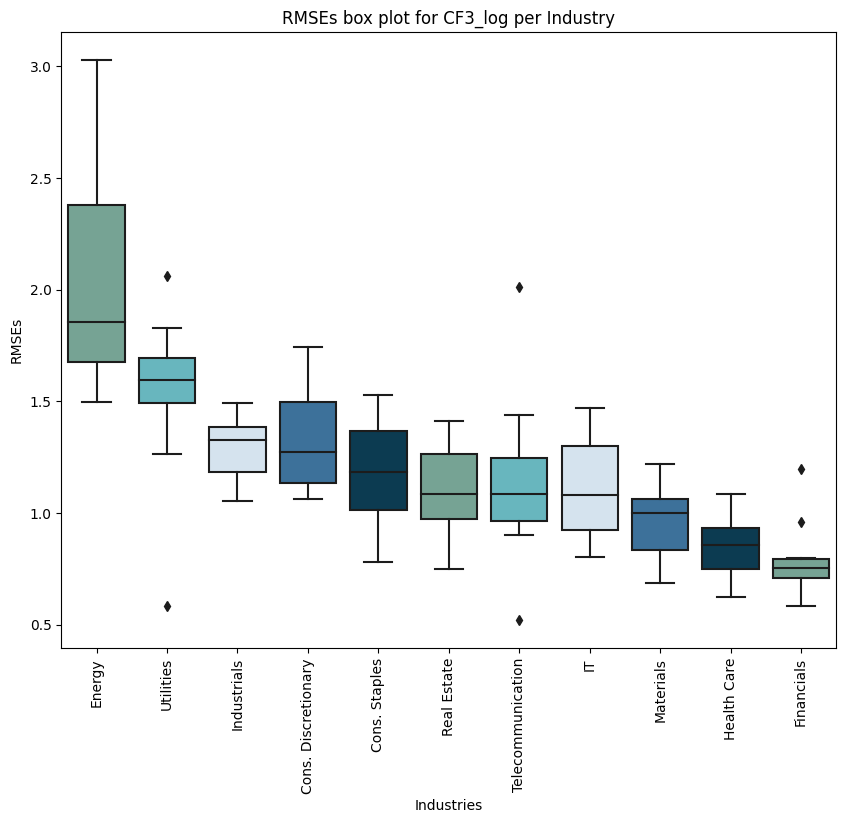

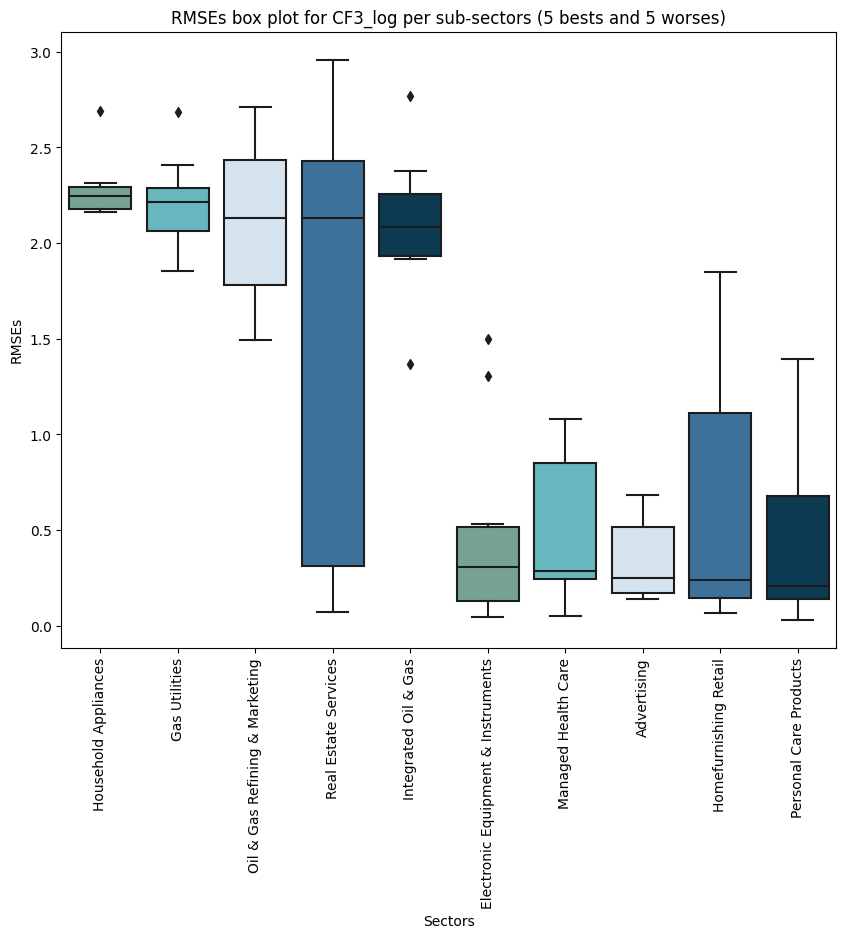

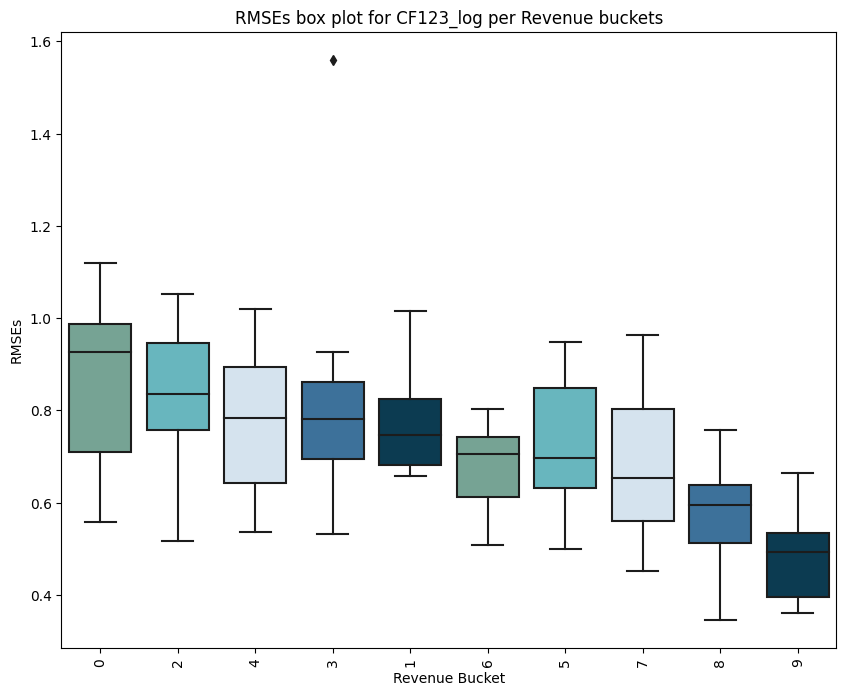

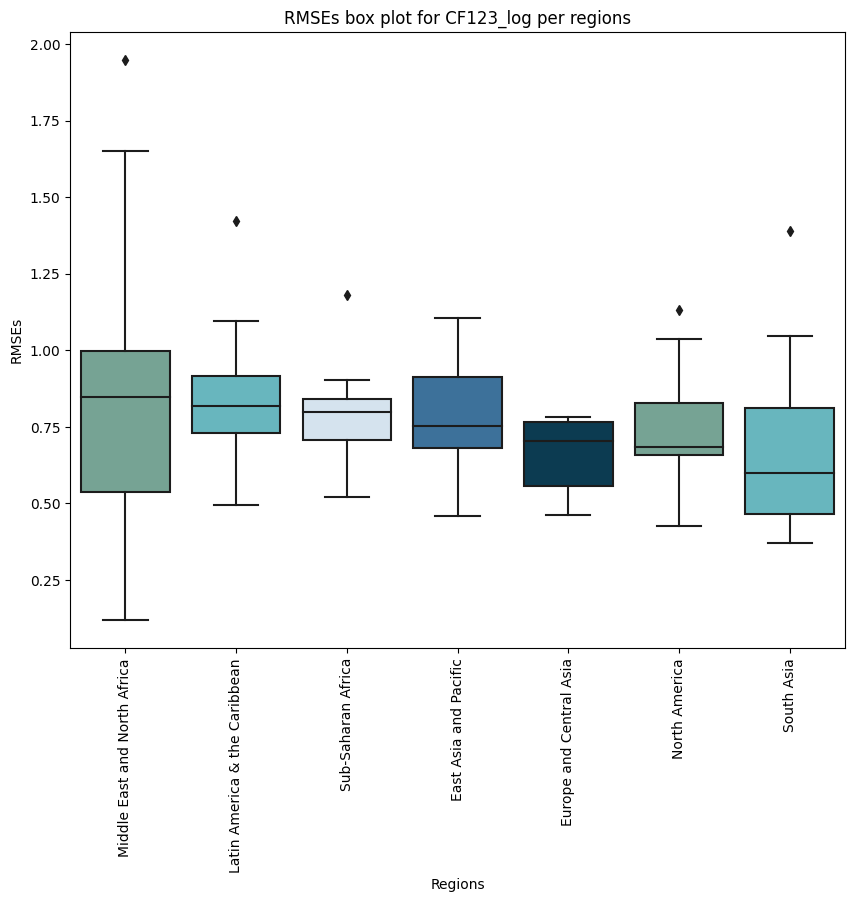

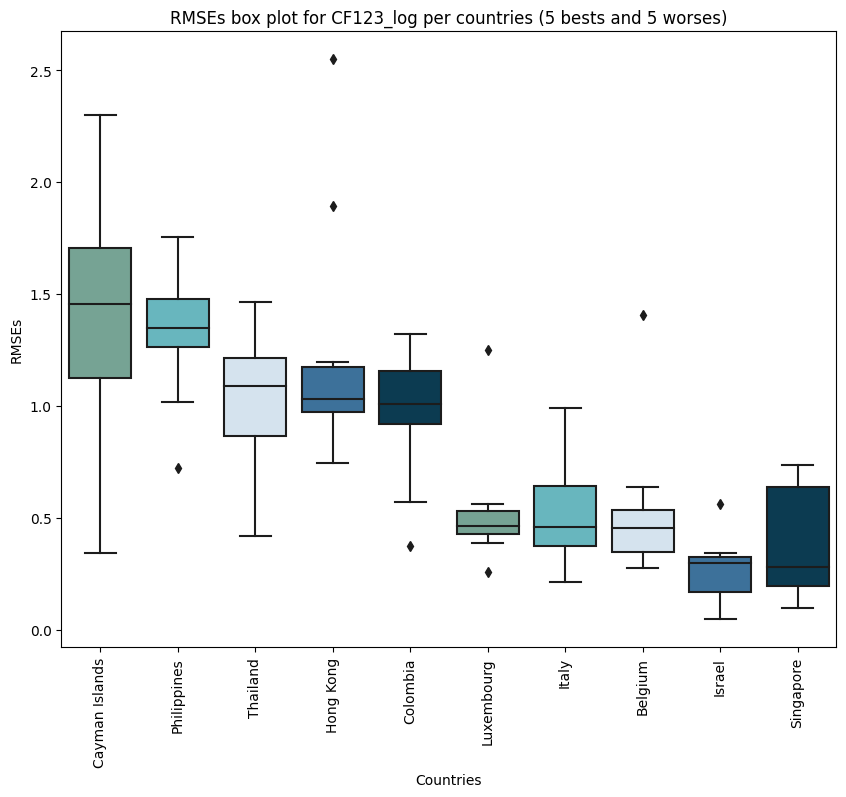

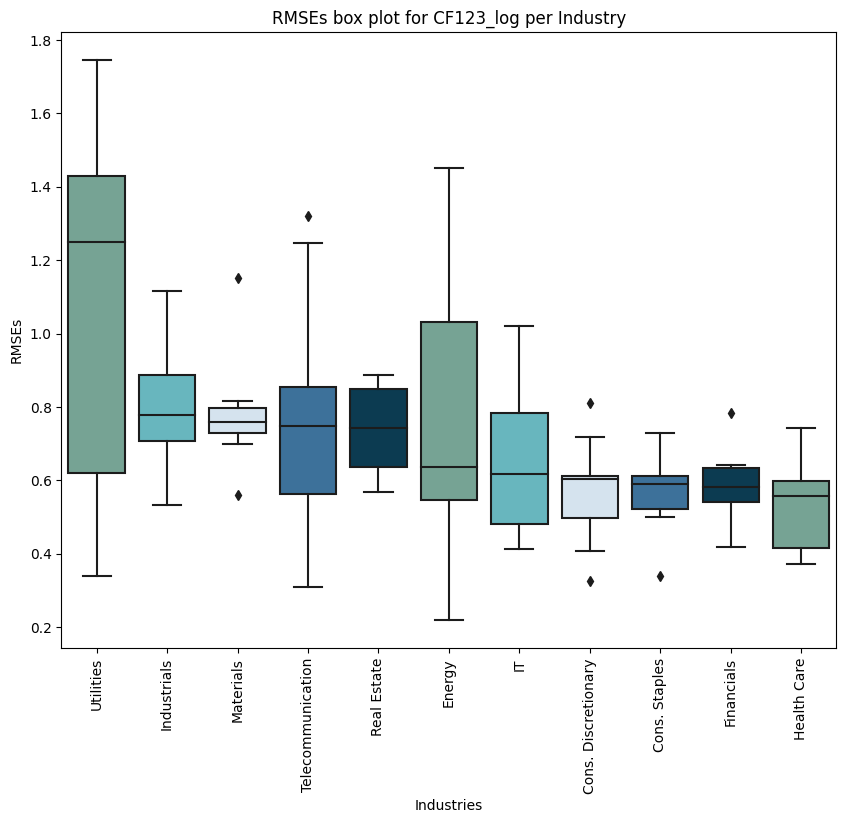

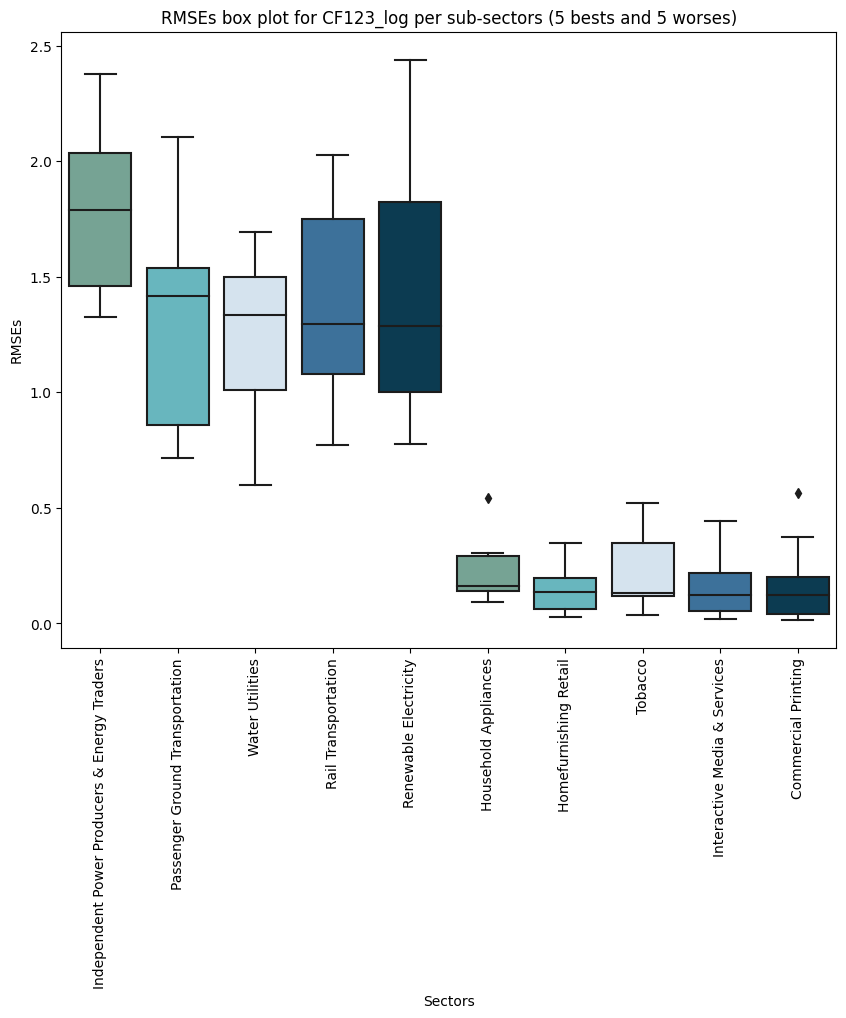

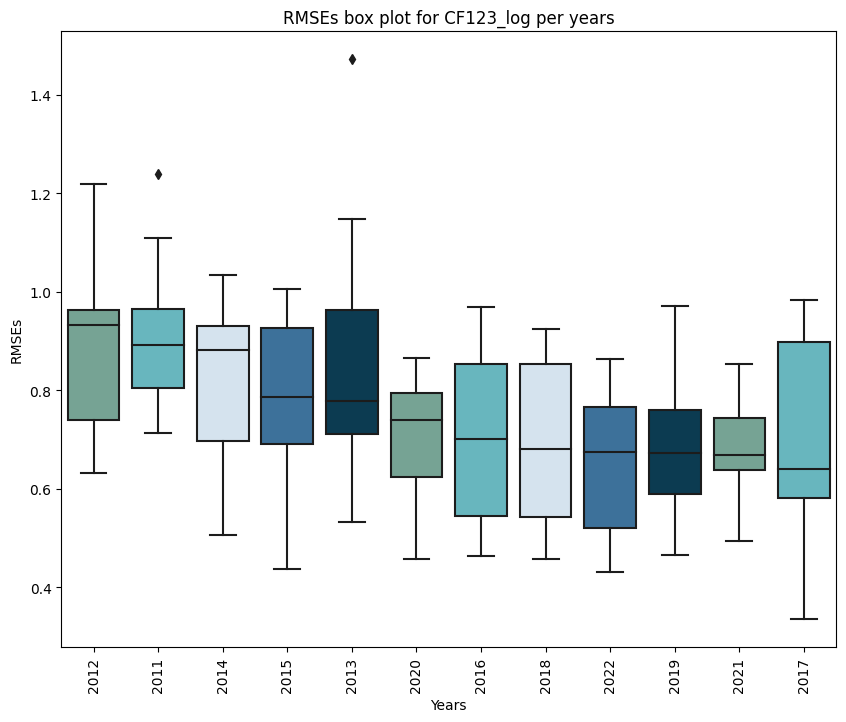

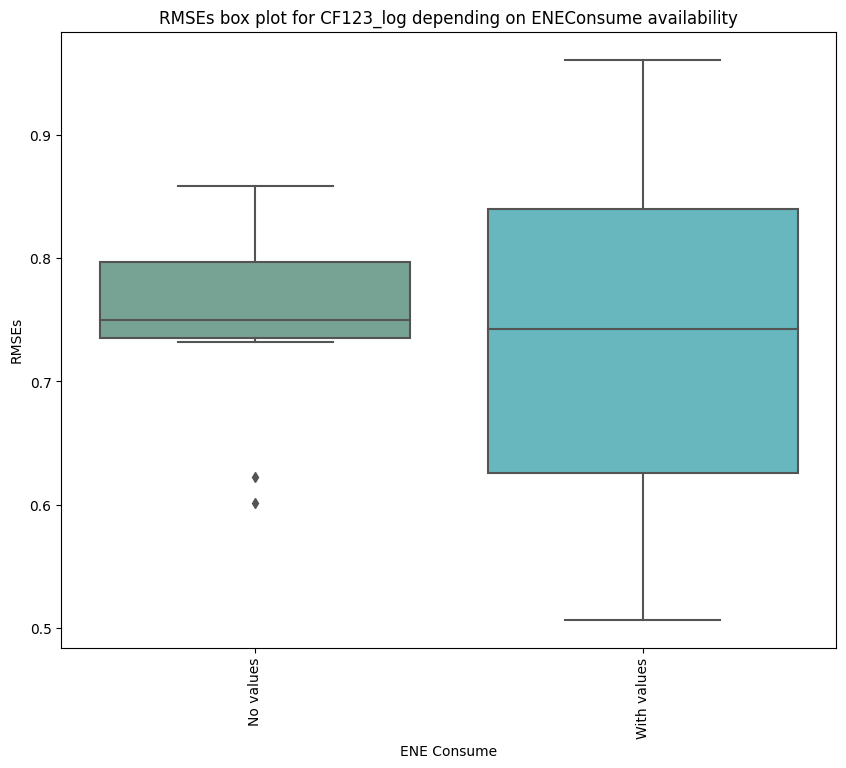

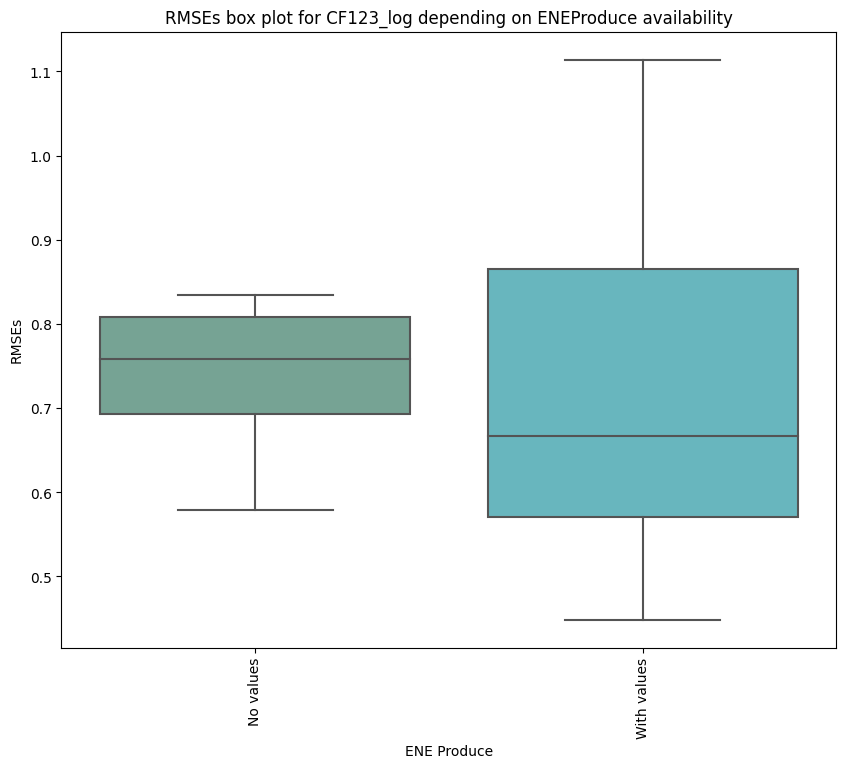

In [6]:
# test  CV = 3h30

models = {
        # "xgboost": xgboost_model,
        "catboost": catboost_model,
        # "lgbm": lgbm_model,
}

targets = ["CF1_log", "CF2_log","CF3_log", "CF123_log"]
Summary_Final=[]
Summary_Final_train = []
ensemble =[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []
use_weights = False
companies = False
custom_gradient = False
training_parameters["cross_val"] = False
save=True
restricted_features=False

best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    path_Benchmark=path_Benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot = path_plot,
    targets=targets,
    models=models,
    Summary_Final=Summary_Final,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes = estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    restricted_features=restricted_features,
    save=save,
)

In [8]:
df_test

,FinalEikonID,Name_x,ISIN_x,Ticker_x,CountryHQ_x,NAICSSector_x,NAICSInd_x,GICSSector_x,GICSGroup_x,GICSInd_x,...,CF1_y,CF2_y,CF3_y,CF123_y,CDP_CF2_y,country_sector_y,intensity_CF1_merge_y,intensity_CF2_merge_y,intensity_CF3_merge_y,intensity_CF123_merge_y
0,EAST9.ST,Eastnine AB (publ),SE0002158568,EAST,Sweden,53,531120,60.0,6020.0,602010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EAST9.ST,Eastnine AB (publ),SE0002158568,EAST,Sweden,53,531120,60.0,6020.0,602010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EAST9.ST,Eastnine AB (publ),SE0002158568,EAST,Sweden,53,531120,60.0,6020.0,602010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMP.AX,AMP Ltd,AU000000AMP6,AMP,Australia,52,523940,40.0,4020.0,402010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AMP.AX,AMP Ltd,AU000000AMP6,AMP,Australia,52,523940,40.0,4020.0,402010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,3682.TW,Asia Pacific Telecom Co Ltd,TW0003682001,3682,Taiwan,51,517112,50.0,5010.0,501010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6376,BMAX.ST,Byggmax Group AB,SE0003303627,BMAX,Sweden,44-45,444110,25.0,2550.0,255040.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6377,BMAX.ST,Byggmax Group AB,SE0003303627,BMAX,Sweden,44-45,444110,25.0,2550.0,255040.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,RBPJ.J,Royal Bafokeng Platinum Ltd,ZAE000149936,RBP,South Africa,21,212290,15.0,1510.0,151040.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
best_scores

[0.5233991620098789]

In [10]:
best_stds

[0.0849405809048883,
 0.043857720884303515,
 0.07109366583596602,
 0.03142843126577676,
 0.06721955253834754,
 0.028727948594034262,
 0.05513673783952483,
 0.01536351468911149]

In [12]:
summary_global

,Target,model,mae,mse,r2,rmse,mape,std
0,CF1_log,xgboost,0.384867,0.297439,0.846199,0.545380,0.098176,0.030863
1,CF1_log,catboost,0.364882,0.269125,0.860840,0.518772,0.093121,0.033133
2,CF1_log,lgbm,0.366428,0.271653,0.859533,0.521203,0.093566,0.028988
3,CF2_log,xgboost,0.308469,0.190189,0.800569,0.436106,0.069413,0.022927
4,CF2_log,catboost,0.287243,0.168781,0.823017,0.410829,0.064718,0.019413
5,CF2_log,lgbm,0.304856,0.183243,0.807852,0.428069,0.068589,0.019297
6,CF3_log,xgboost,0.708359,0.827975,0.631165,0.909931,0.157102,0.049243
7,CF3_log,catboost,0.670972,0.737714,0.671373,0.858903,0.148141,0.054020
8,CF3_log,lgbm,0.687170,0.770067,0.656961,0.877534,0.151689,0.041408
9,CF123_log,xgboost,0.412447,0.307370,0.797339,0.554410,0.076512,0.050749


In [8]:
best_scores
# last [0.5225673205853884, 0.40811509811421237, 0.85109105089482, 0.5229286278975259]
# bfill  [0.5191873785067047, 0.40902681903531696, 0.8617273035803013, 0.5230248000437574]
# ffill  [0.5187721230487552, 0.41082930646576615, 0.8589029583765776, 0.5226329977169409]
# nofill [0.5233991620098789, 0.40811509811421237, 0.8510910508948200, 0.5229286278975259]

# ffill nofill nofill ffill

# with CV (la CV prend 3h30 et n'améliore pas les performances)
# bfill  
# ffill  [0.5249321364858544, 0.4243203483708837, 0.8845126900597352, 0.5294931508850457]
# nofill 


[0.5249321364858544,
 0.4243203483708837,
 0.8845126900597352,
 0.5294931508850457]

In [ ]:
# Initial grid
# [0.718863070915766, 
#  0.5436700671297622, 
#  1.0526040758198016, 
#  0.6342521777936404]

# just using inf threshold
# [0.7018124871336399, # better 
#  0.5313084292372081, # better 
#  1.0378449220709638, # better 
#  0.6290781450386738] # better 


# CF123 comparison : 
# [0.7234012636609329, # worse
#  0.5650729256715145, # worse
#  1.0565618159862236, # worse
#  0.6342521777936404] # same (normal)

# Outliers removal before split, per target
# [0.5283557509005923,
#  0.42400993566684136,
#  0.8966142053519602,
#  0.5533837847917039]

# global removal (remove line for all scopes instead of per scopes) : 
# [0.4940438778909675, # best
#  0.4899781334699924,  
#  0.9720296280063642,  
#  0.5320520022173726]  
# outlier before (drop unknown diff) 
# [0.5233991620098789,
# 0.40811509811421237, # best
# 0.85109105089482,    # best
# 0.5229286278975259]  # best

# outlier before (replace na)
# [0.7018124871336399,
#  0.5313084292372081,
#  1.0378449220709638,
#  0.6290781450386738]

# outlier before (remove companies)
# [0.5309444158752653, 
# 0.41053559533269984, 
# 0.912072400444415,
# 0.556608237281898]

# restricted 123
# [0.5331540734213799, 0.4292544654621834, 0.859062349682098, 0.5229286278975259]
# [0.10029839422255536, 0.10805610516808886, 0.07320825905490065, 0.05513673783952483]

[0.5283557509005923,
 0.42400993566684136,
 0.8966142053519602,
 0.5533837847917039]

# Restriction to CF123 filter

In [37]:
# test restricted to CF123
targets = ["CF1_log_CF123","CF2_log_CF123","CF3_log_CF123", "CF123_log"]

best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    name_experiment="restriction_CF123_test_uniform test_CVTrue",
    path_Benchmark=path_Benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot = path_plot,
    targets=targets,
    models=models,
    Summary_Final=Summary_Final,
    # Summary_Final_train =Summary_Final_train,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes = estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    restricted_features=False,
    save=False,
)

CF1_log_CF123


Using pre created preprocessed files
preprocessing done


2023/08/01 12:03:43 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/01 12:03:47 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 38
Created version '38' of model 'xgboost'.
2023/08/01 12:03:52 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/01 12:03:55 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 38
Created version '38' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/01 12:03:56 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/01 12:03:59 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 38
Created version '38' of model 'lgbm'.


modelisation done
CF2_log_CF123
Using pre created preprocessed files
preprocessing done


2023/08/01 12:04:07 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/01 12:04:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 39
Created version '39' of model 'xgboost'.
2023/08/01 12:04:15 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/01 12:04:19 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 39
Created version '39' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001876 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/01 12:04:19 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/01 12:04:22 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 39
Created version '39' of model 'lgbm'.


modelisation done
CF3_log_CF123
Using pre created preprocessed files
preprocessing done


2023/08/01 12:04:30 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/01 12:04:33 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 40
Created version '40' of model 'xgboost'.
2023/08/01 12:04:39 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/01 12:04:42 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 40
Created version '40' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001804 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/01 12:04:42 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/01 12:04:46 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 40
Created version '40' of model 'lgbm'.


modelisation done
CF123_log
Using pre created preprocessed files
preprocessing done


2023/08/01 12:04:54 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/01 12:04:57 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 41
Created version '41' of model 'xgboost'.
2023/08/01 12:05:03 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/01 12:05:06 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 41
Created version '41' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/01 12:05:06 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/01 12:05:09 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 41


modelisation done


Created version '41' of model 'lgbm'.


In [38]:
best_scores # with CF123 standardization
# no CV [0.7234012636609329,
#  0.5650729256715145,
#  1.0565618159862236,
#  0.6342521777936404]

[0.7234012636609329,
 0.5650729256715145,
 1.0565618159862236,
 0.6342521777936404]

# Test seed influence

In [9]:
from functions.preprocessing import custom_train_split
from functions.results import  metrics

training_parameters["cross_val"] = True

In [88]:
# Analyse variance seed model
# 22h, à ne pas reproduire à la maison

targets = ["CF1_log_CF123","CF2_log_CF123","CF3_log_CF123", "CF123_log"]
name_experiment = "analysis_seed_model_influence_00"

best_scores = {
    "CF1_log_CF123" : [],
    "CF2_log_CF123" : [],
    "CF3_log_CF123" : [],
    "CF123_log" : [],
}
best_stds = {
    "CF1_log_CF123" : [],
    "CF2_log_CF123" : [],
    "CF3_log_CF123" : [],
    "CF123_log" : [],
}

for target in targets:
    print(target)
    (
        X_train,
        y_train,
        X_test,
        y_test,
        df_test,
    ) = custom_train_split(
        preprocessed_dataset,
        path_Benchmark,
        path_intermediary,
        target,
        # threshold_under=training_parameters["threshold_under"],
        # threshold_over=training_parameters["threshold_over"],
        extended_features=training_parameters["extended_features"],
        selec_sect=training_parameters["selec_sect"],
        fill_grp=training_parameters["fill_grp"],
        old_pipe=training_parameters["old_pipe"],
        restricted_features=False,
    )
    # seed = training_parameters["seed"]
    n_iter = training_parameters["n_iter"]
    print("preprocessing done")
    for seed in range(10) : 
        test_scores = []
        test_stds = []
        for i, (model_name, model) in enumerate(models.items()):
        # with mlflow.start_run() as run:
            model_i = model(
                X_train,
                y_train,
                cross_val=training_parameters["cross_val"],
                n_jobs=-1,
                verbose=0,
                n_iter=n_iter,
                seed=seed,
            )
            y_pred = model_i.predict(X_test)

            summary_global, rmse, std = metrics(y_test, y_pred, Summary_Final, target, model_name)
            ensemble.append(model_i)
            test_scores.append(rmse)
            test_stds.append(std)

        best_scores[target].append(test_scores[test_scores.index(min(test_scores))])
        best_stds[target].append(test_stds[test_scores.index(min(test_scores))])
    print("modelisations done")


CF1_log_CF123
Using pre created preprocessed files
preprocessing done
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002148 seconds

In [94]:
target = "CF1_log_CF123"
best_scores[target]

[0.5331540734213799,
 0.5360074831899618,
 0.5382189058069249,
 0.5298694693143241,
 0.5340767842482714,
 0.5352108983832541,
 0.541092377134454,
 0.5307035015735889,
 0.5363584396724036,
 0.5352781513752242]

CF3_log_CF123
0.8592018955553286  +/-  0.002747998731523164 (variance due to seed)
0.8592018955553286  +/-  0.07380153278094363 (variance due to test set)
rapport seed VS test :  26.856465373998493


<AxesSubplot:>

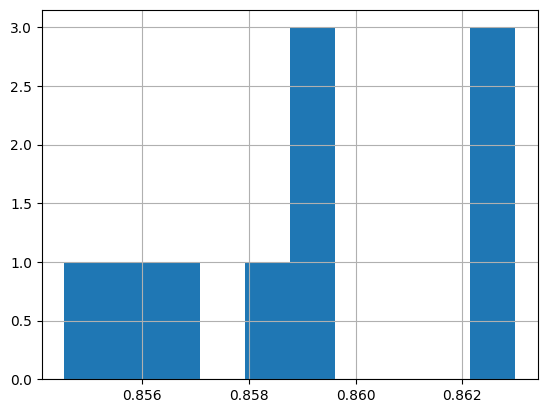

In [124]:
target = targets[2] #31, 38, 26, 64
print(target)
print(np.mean(best_scores[target]), " +/- ", np.std(best_scores[target]), "(variance due to seed)")
print(np.mean(best_scores[target]), " +/- ", np.mean(best_stds[target]), "(variance due to test set)")
print("rapport seed VS test : ", np.mean(best_stds[target])/np.std(best_scores[target]))
pd.Series(best_scores[target]).hist()

CF2_log_CF123
0.428748571285022  +/-  0.002730458040318186


<AxesSubplot:>

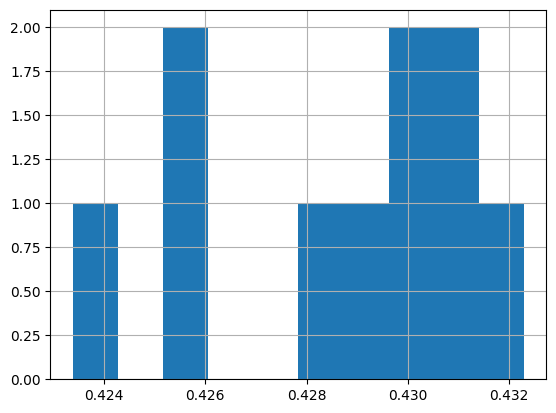

In [91]:
target = targets[1]
print(target)
print(np.mean(best_scores[target]), " +/- ", np.std(best_scores[target]))
pd.Series(best_scores[target]).hist()

CF3_log_CF123
0.8592018955553286  +/-  0.002747998731523164


<AxesSubplot:>

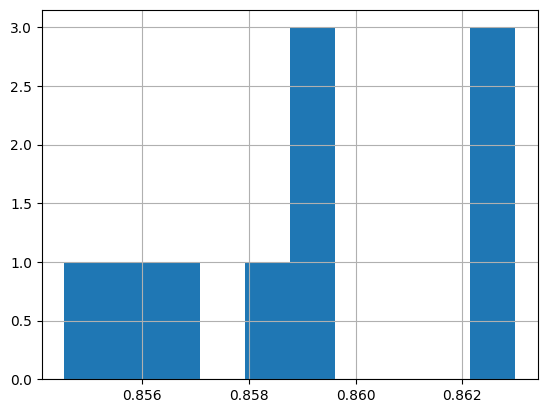

In [92]:
target = targets[2]
print(target)
print(np.mean(best_scores[target]), " +/- ", np.std(best_scores[target]))
pd.Series(best_scores[target]).hist()

CF123_log
0.5235719239793513  +/-  0.000840491431264687


<AxesSubplot:>

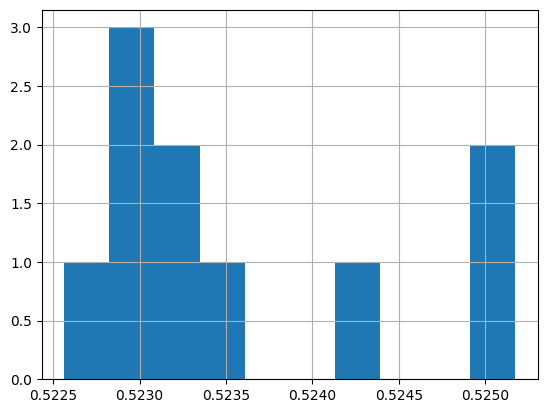

In [93]:
target = targets[3]
print(target)
print(np.mean(best_scores[target]), " +/- ", np.std(best_scores[target]))
pd.Series(best_scores[target]).hist()

In [113]:
X_train.shape #(11056, 281)
X_train.index.nunique()
X_train.join(preprocessed_dataset[["CDP_CF1", "CDP_CF2", "CDP_CF3", "CDP_CF123","country_sector"]]) # (11056, 281)

,Revenue_log,EMP_log,Asset_log,NPPE_log,CapEx_log,Age,CapInten,GMAR,Leverage,Price,...,GICSGroup__4530.0,GICSGroup__5010.0,GICSGroup__5020.0,GICSGroup__5510.0,GICSGroup__6010.0,GICSGroup__6020.0,CDP_CF1,CDP_CF2,CDP_CF3,country_sector
397,7.897134,2.064458,9.350751,10.112440,10.831741,9.702434,0.027397,69.025367,0.066759,23.782510,...,False,False,False,False,False,False,NaN,NaN,NaN,Oman_40203030.0
398,8.160991,1.812913,9.075741,10.112377,10.831755,9.388727,0.002035,69.921549,0.027234,26.711392,...,False,False,False,False,False,False,NaN,NaN,NaN,Oman_40203030.0
1768,7.549280,0.000000,9.267156,10.114717,10.831723,20.648791,1.999192,50.175630,0.146231,NaN,...,False,False,False,False,True,False,NaN,NaN,NaN,Vietnam_20103010.0
1769,7.668216,0.000000,9.280163,10.115113,10.831630,21.127492,1.623123,63.207330,0.172121,NaN,...,False,False,False,False,True,False,NaN,NaN,NaN,Vietnam_20103010.0
2324,8.466195,1.799341,9.424651,10.113606,10.831738,36.700000,0.126503,67.028713,0.000000,23.588994,...,False,False,False,False,False,False,NaN,NaN,NaN,Sweden_40203010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572907,8.916332,3.940367,9.394843,10.163364,10.830621,15.574946,1.956778,25.803950,0.391945,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,Hong Kong_20303010.0
573560,8.880801,3.301247,9.239189,10.131997,10.831464,12.810310,0.788027,22.918570,0.170906,31.834461,...,False,False,False,False,False,False,NaN,NaN,NaN,Australia_60101010.0
573561,8.980481,3.301247,9.233544,10.132808,10.831082,13.699213,0.652917,24.713730,0.182120,21.101497,...,False,False,False,False,False,False,NaN,NaN,NaN,Australia_60101010.0
573805,8.811566,4.540342,10.272534,10.435779,10.826911,25.557205,22.103862,48.059850,0.617715,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,Turkey_40203010.0


# Test Forbes

In [6]:
training_parameters["extended_features"] = ["Revenue_log", "Asset_log", "EBIT_log"]
training_parameters["selec_sect"] = ["GICSSubInd"]

Summary_Final=[]
Summary_Final_train = []
ensemble =[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []

path_rawdata = 'data/raw_data/'
path_models = 'models/restricted_features/'
path_Benchmark = 'Benchmark/'
path_results = 'results/restricted_features/'
path_plot = path_results +'plot/'
path_intermediary = 'data/intermediary_data/restricted_features/'
path_plot = 'results/restricted_features/plot/'

CF1_log
Using pre created preprocessed files
preprocessing done


2023/08/30 17:18:35 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/30 17:18:45 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 124
Created version '124' of model 'xgboost'.
2023/08/30 17:18:52 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/30 17:18:58 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 240
Created version '240' of model 'catboost'.
2023/08/30 17:18:59 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already 

modelisation done


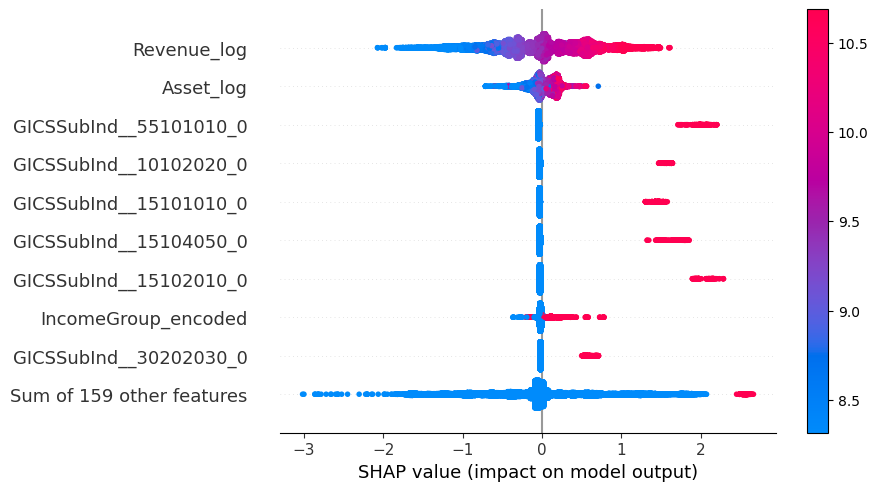

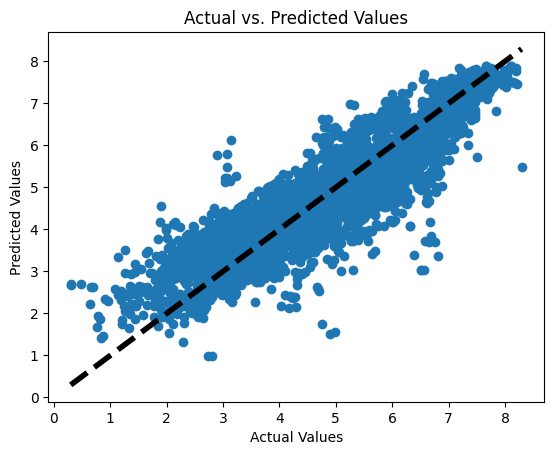

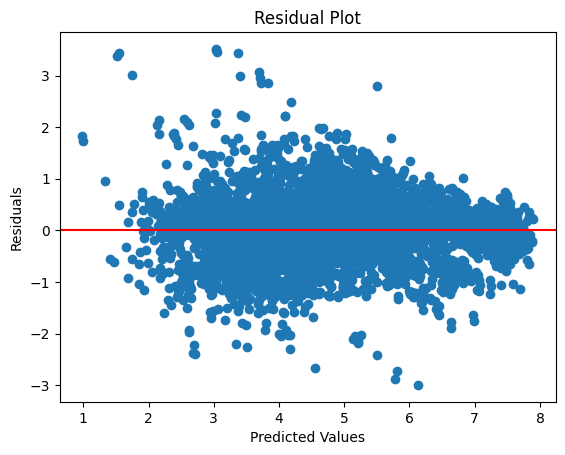

CF2_log
Using pre created preprocessed files
preprocessing done


2023/08/30 17:20:20 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/30 17:20:26 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 125
Created version '125' of model 'xgboost'.
2023/08/30 17:20:32 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/30 17:20:38 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 241
Created version '241' of model 'catboost'.
2023/08/30 17:20:38 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already 

modelisation done


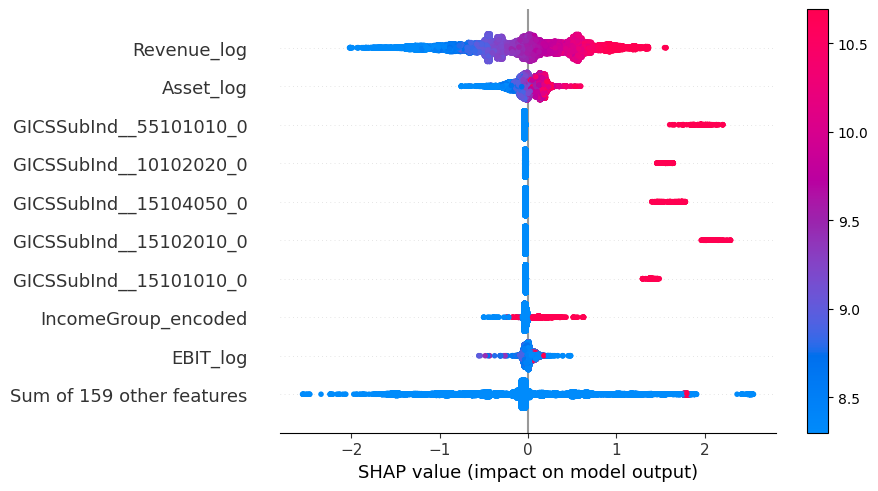

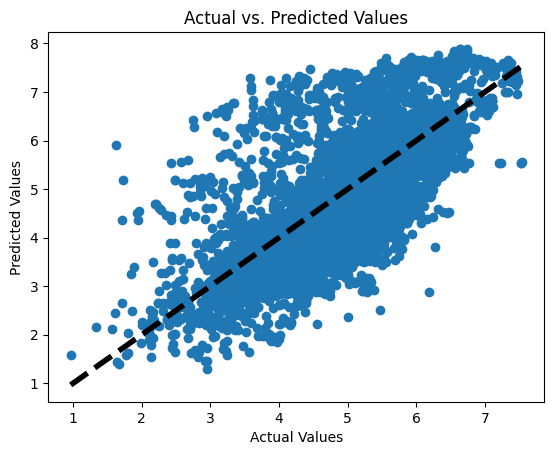

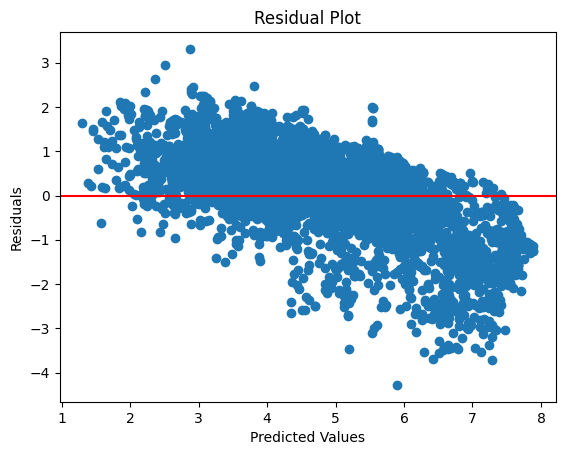

CF3_log
Using pre created preprocessed files
preprocessing done


2023/08/30 17:21:55 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/30 17:22:02 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 126
Created version '126' of model 'xgboost'.
2023/08/30 17:22:08 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/30 17:22:14 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 242
Created version '242' of model 'catboost'.
2023/08/30 17:22:14 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already 

modelisation done


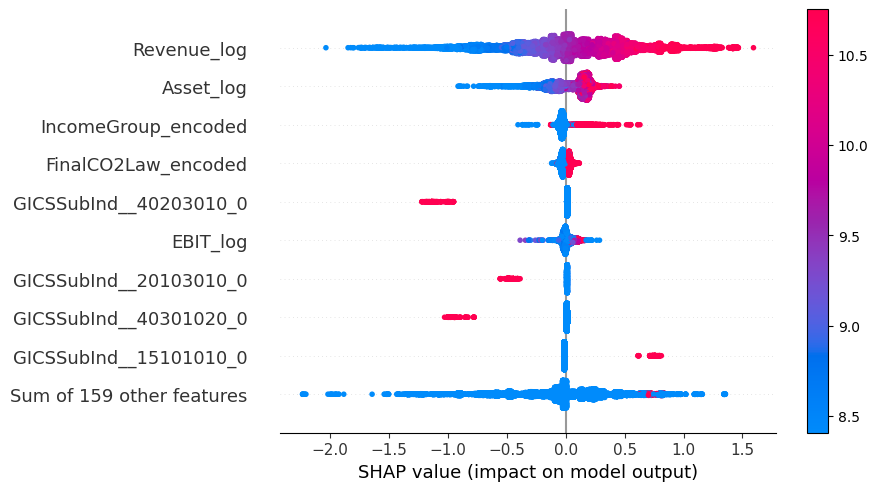

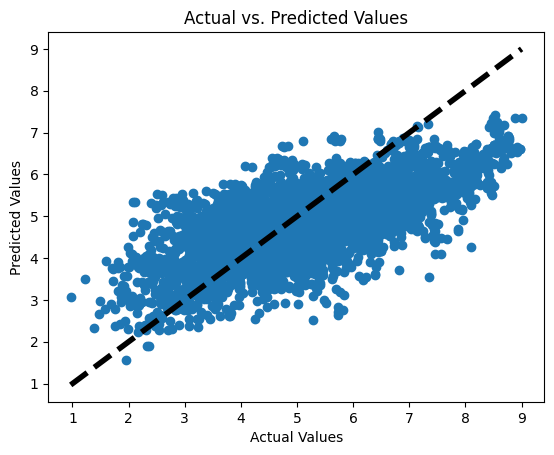

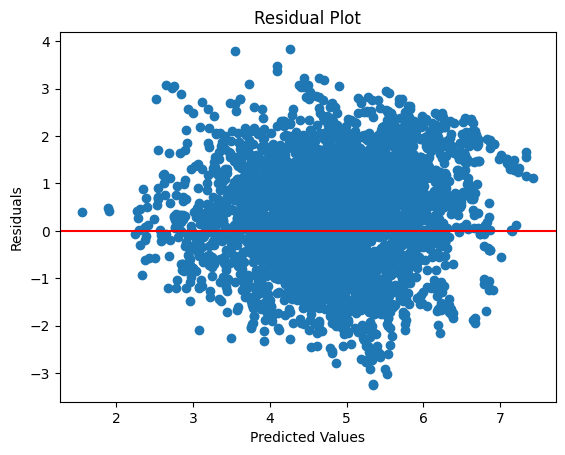

CF123_log
Using pre created preprocessed files
preprocessing done


2023/08/30 17:23:38 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/30 17:23:48 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 127
Created version '127' of model 'xgboost'.
2023/08/30 17:23:54 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/30 17:23:59 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 243
Created version '243' of model 'catboost'.
2023/08/30 17:24:00 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already 

modelisation done


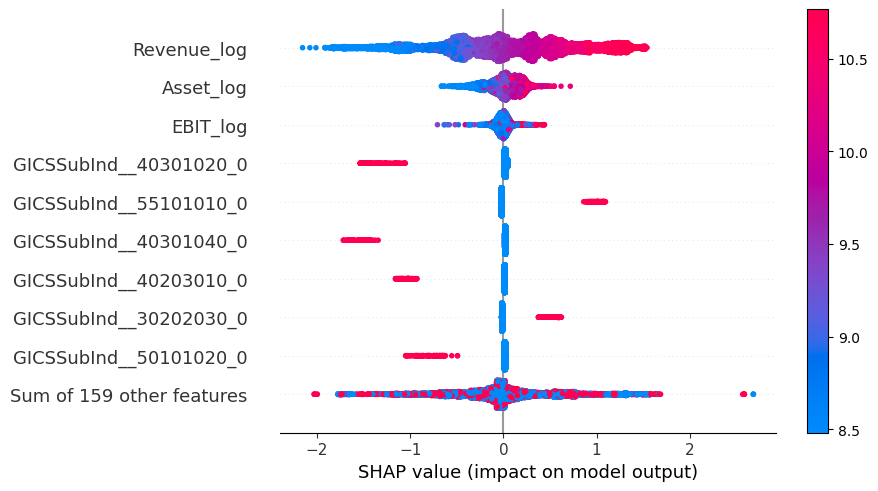

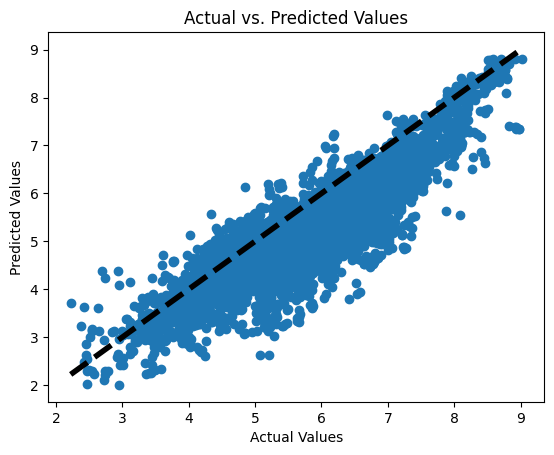

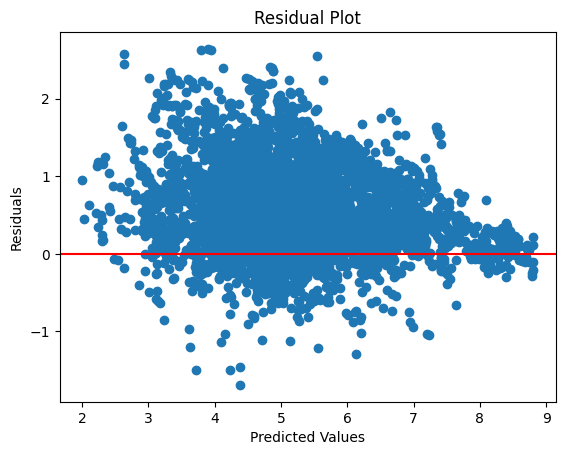

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# test 


targets = ["CF1_log", "CF2_log","CF3_log", "CF123_log"]
use_weights = False
companies = False
custom_gradient = False
training_parameters["cross_val"] = False
restricted_features = True
save=True

best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    name_experiment="restricted_features_save_4",
    path_Benchmark=path_Benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot = path_plot,
    targets=targets,
    models=models,
    Summary_Final=Summary_Final,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes = estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    restricted_features=restricted_features,
    save=save,
    use_weights=use_weights,
    companies=companies,
    custom_gradient=custom_gradient, # False, "L1", "L2"
)

In [7]:
best_scores

[0.5898082056101469,
 0.5137802080316187,
 0.9203261372108518,
 0.5611358794702007]

In [8]:
best_stds

[0.07534818809242953,
 0.08059540104880723,
 0.05542361627542579,
 0.06239963439251774]

In [9]:
summary_global

,Target,model,mae,mse,r2,rmse,mape,std
0,CF1_log,xgboost,0.456208,0.384477,0.801194,0.620062,0.117045,0.078988
1,CF1_log,catboost,0.431479,0.347874,0.820120,0.589808,0.110695,0.075348
2,CF1_log,lgbm,0.454462,0.384995,0.800926,0.620480,0.120402,0.097667
3,CF2_log,xgboost,0.404144,0.282564,0.703705,0.531567,0.090978,0.077129
4,CF2_log,catboost,0.388092,0.263970,0.723202,0.513780,0.087127,0.080595
5,CF2_log,lgbm,0.403445,0.279477,0.706941,0.528656,0.090943,0.081379
6,CF3_log,xgboost,0.753490,0.927023,0.587042,0.962820,0.168399,0.065494
7,CF3_log,catboost,0.727710,0.847000,0.622689,0.920326,0.161743,0.055424
8,CF3_log,lgbm,0.763392,0.924192,0.588303,0.961349,0.170395,0.049776
9,CF123_log,xgboost,0.450684,0.345070,0.772482,0.587426,0.084202,0.056143


In [6]:
from functions.restricted_features import apply_model_on_forbes_data

df_forbes_completed = apply_model_on_forbes_data(
    path_rawdata=path_rawdata,    
    path_results=path_results,
    path_intermediary=path_intermediary,
    path_models=path_models,
    save=True,
)

In [7]:
df_forbes_completed[:2]

,Name,CountryHQ,Revenue,EBIT,Asset,FiscalYear,GICSSubInd,Region,CF1_E,CF2_E,CF3_E,CF123_E,CF1_E + CF2_E + CF3_E
0,360 Security Technology,China,3.210000e+08,10000000.0,3.637000e+09,2017,Systems Software,East Asia and Pacific,67756.433070,186084.889764,110712.115155,8.563414e+05,1.220895e+06
1,360 Security Technology,China,1.949000e+09,534000000.0,4.287000e+09,2018,Systems Software,East Asia and Pacific,332433.063546,784186.395839,811523.125992,4.265893e+06,6.194036e+06


In [8]:
import matplotlib.pyplot as plt

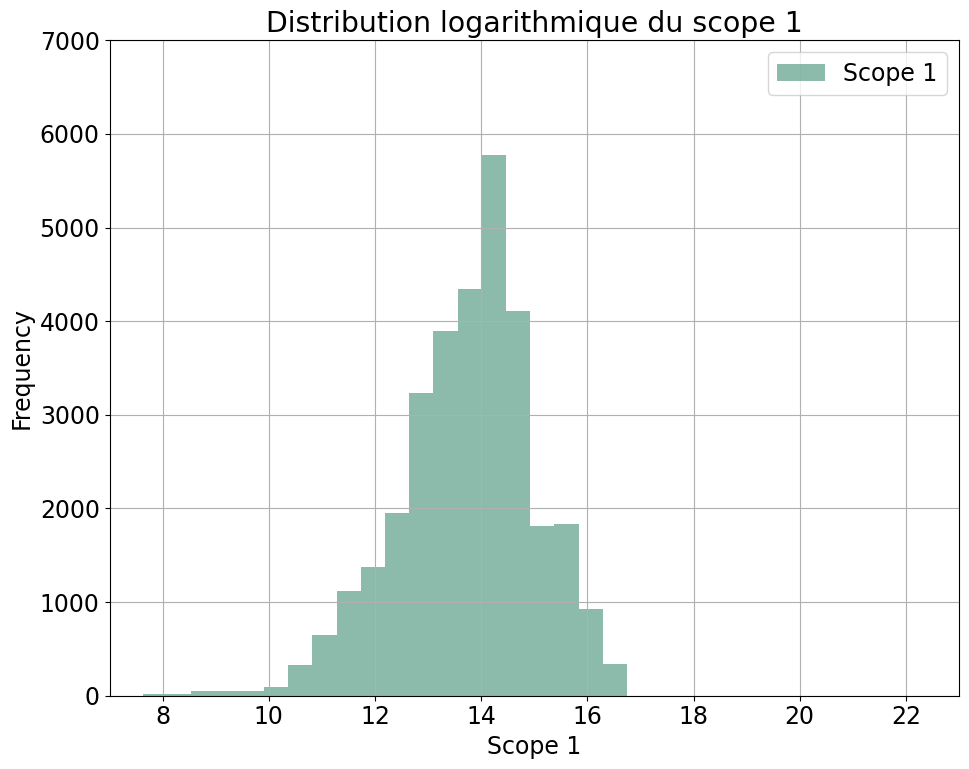

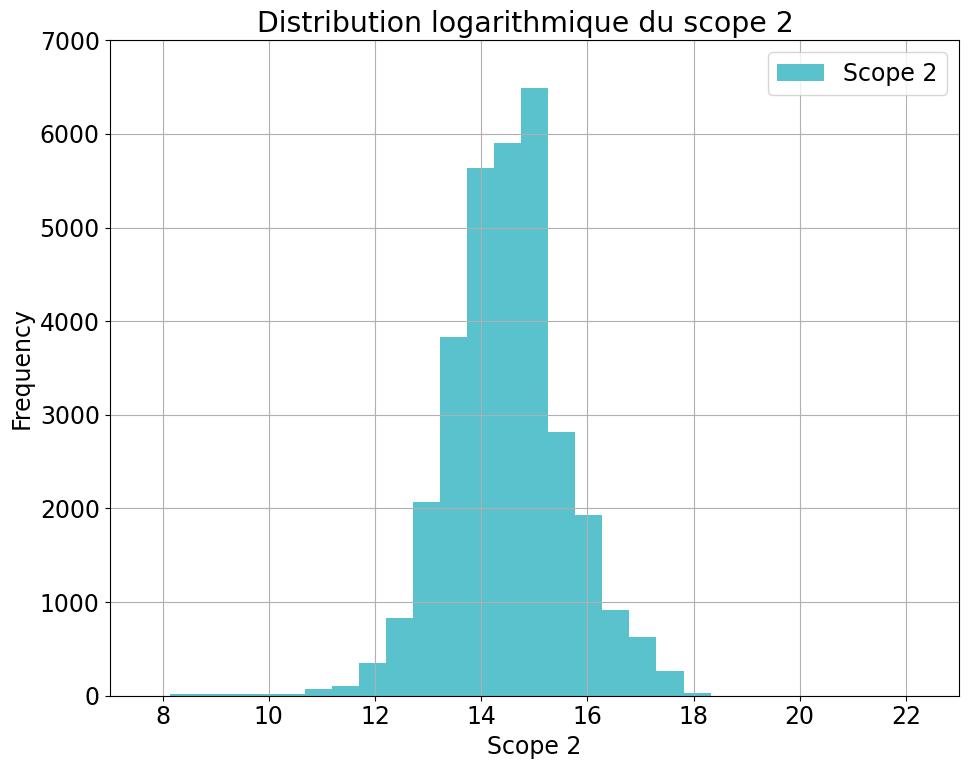

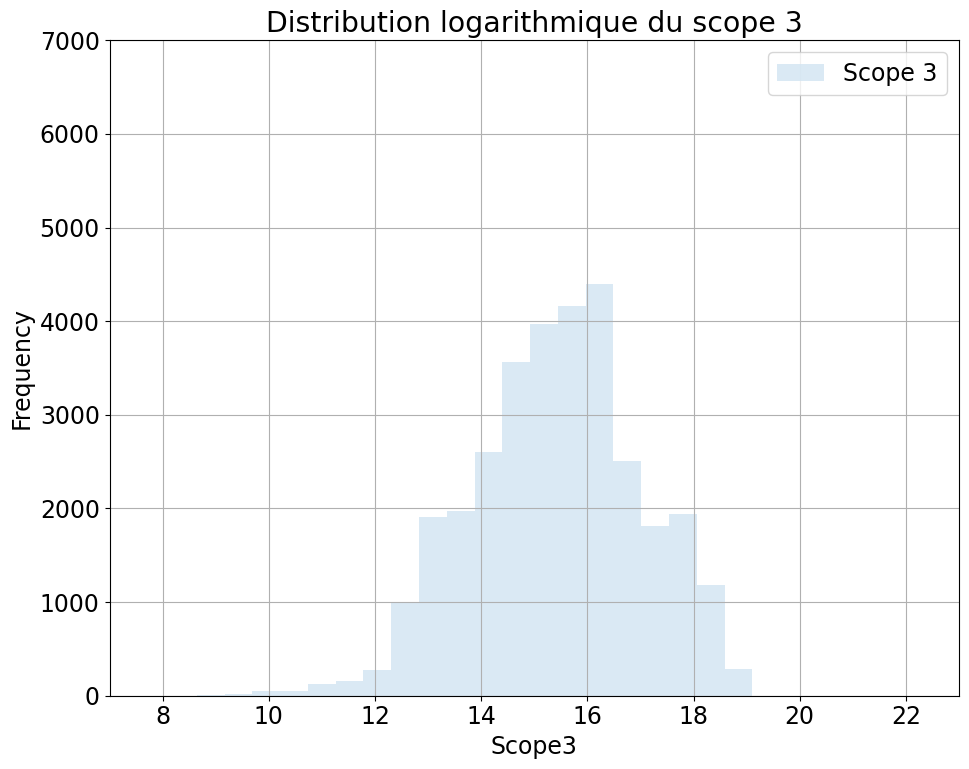

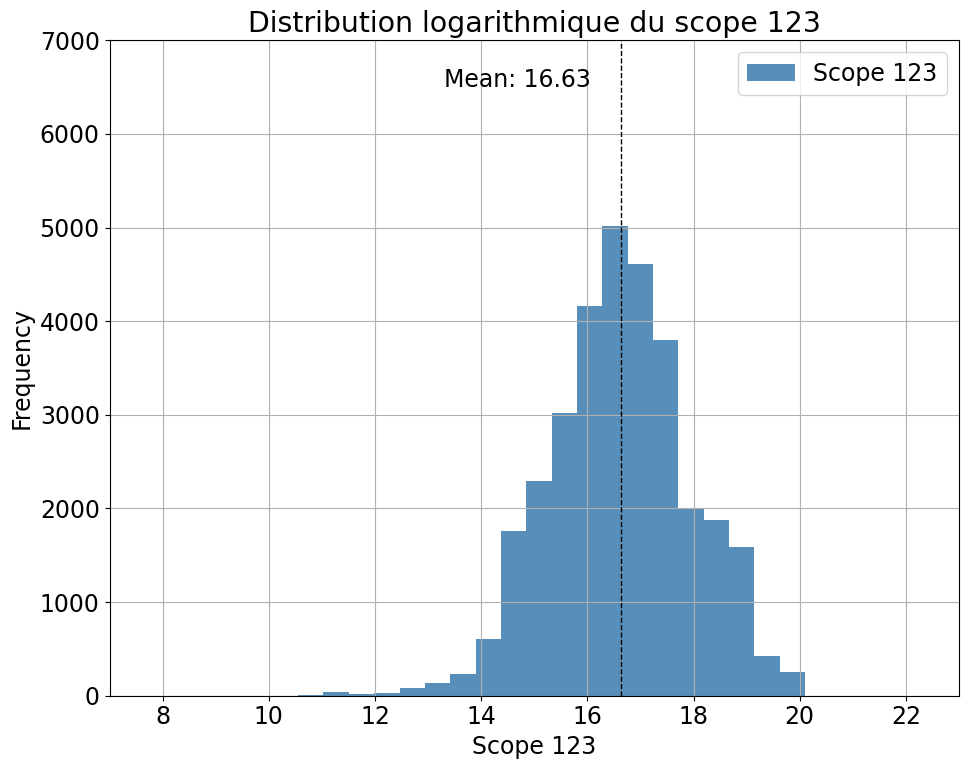

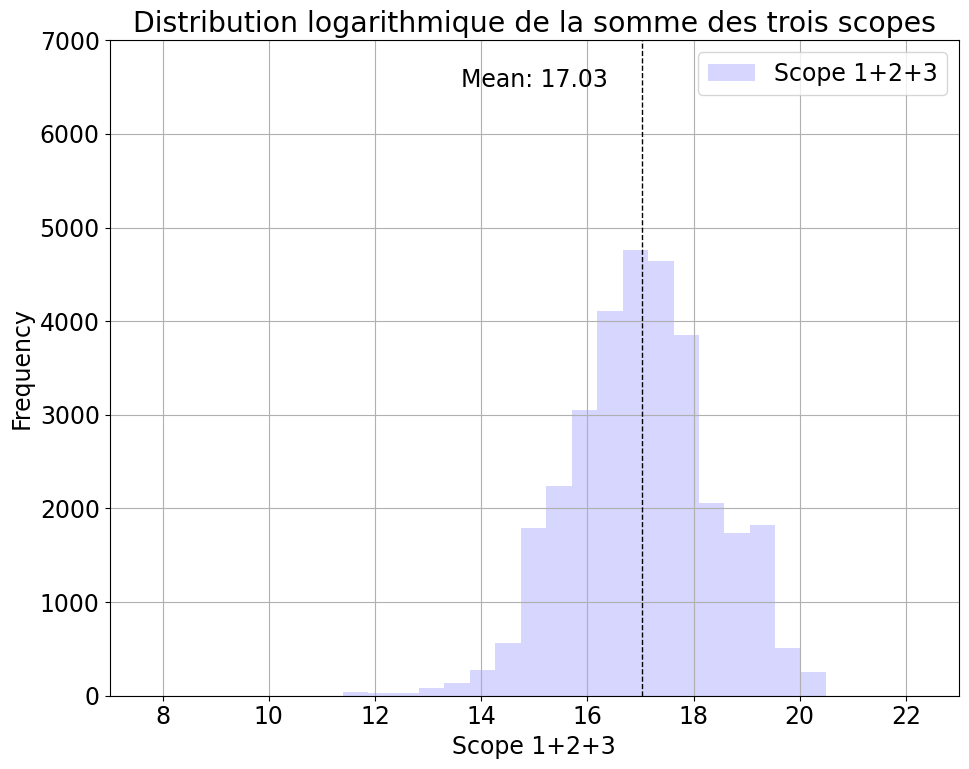

In [14]:
lst_scopes = ["CF1_E", "CF2_E", "CF3_E", "CF123_E", "CF1_E + CF2_E + CF3_E"]
colors = ['#6FAA96', '#5AC2CC', '#D1E4F2', '#2E73A9', '#CCCCFF']

plt.rcParams['font.size'] = 17

for i, scope in enumerate(lst_scopes):
    plt.figure(figsize=(10, 8))
    CDP_refinitv_merged_copy = np.log(df_forbes_completed[scope] + 1)    

    if i == 0 :
        plt.hist(CDP_refinitv_merged_copy, bins=20, color=colors[i], alpha=0.8, label='Scope 1')
        plt.xlabel("Scope 1")
        plt.title( "Distribution logarithmique du scope 1")
    elif i == 1:
        plt.hist(CDP_refinitv_merged_copy, bins=20, color=colors[i], alpha=1, label='Scope 2')
        plt.xlabel("Scope 2")
        plt.title( "Distribution logarithmique du scope 2  ")
    elif i == 2:
        plt.hist(CDP_refinitv_merged_copy, bins=20, color=colors[i], alpha=0.8, label='Scope 3')
        plt.xlabel("Scope3")
        plt.title( "Distribution logarithmique du scope 3")
    elif i == 3:
        plt.hist(CDP_refinitv_merged_copy, bins=20, color=colors[i], alpha=0.8, label='Scope 123')
        plt.xlabel("Scope 123")
        plt.title( "Distribution logarithmique du scope 123")
        plt.axvline(CDP_refinitv_merged_copy.mean(), color='k', linestyle='dashed', linewidth=1)
        plt.text(CDP_refinitv_merged_copy.mean()*0.8, 6500, 'Mean: {:.2f}'.format(CDP_refinitv_merged_copy.mean()))
    elif i == 4:
        plt.hist(CDP_refinitv_merged_copy, bins=20, color=colors[i], alpha=0.8, label='Scope 1+2+3')
        plt.xlabel("Scope 1+2+3")
        plt.title( "Distribution logarithmique de la somme des trois scopes")
        plt.axvline(CDP_refinitv_merged_copy.mean(), color='k', linestyle='dashed', linewidth=1)
        plt.text(CDP_refinitv_merged_copy.mean()*0.8, 6500, 'Mean: {:.2f}'.format(CDP_refinitv_merged_copy.mean()))

    plt.ylabel('Frequency')
    
    
    plt.ylim((0, 7000))
    plt.xlim((7,23))
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

In [41]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_forbes_completed, title="Free Data Based Estimations", minimal=True)
profile.to_file(path_results + "free_data_based_estimations.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]